In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [26]:
lines = ["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"] 

In [27]:
TPM_ipsc = pd.read_csv('RNA_counts/TPMS_hiPSC.csv')

In [29]:
#Color scheme for the figures

import matplotlib
cmap = plt.cm.nipy_spectral  # define the colormap
# extract all colors from the map
cmaplist = [cmap(i) for i in range(cmap.N)]

# create the new map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(-0.5, 9.5, 11)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

In [30]:
pipeline = Pipeline([('scaling', StandardScaler(with_mean=False)), ('pca', PCA(n_components=2))])
PCAs_scatter=pipeline.fit_transform(np.transpose(np.array(TPM_ipsc.iloc[:,1:22])))


In [31]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial'], 'size' : 14})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
cmap = plt.colormaps['tab10']

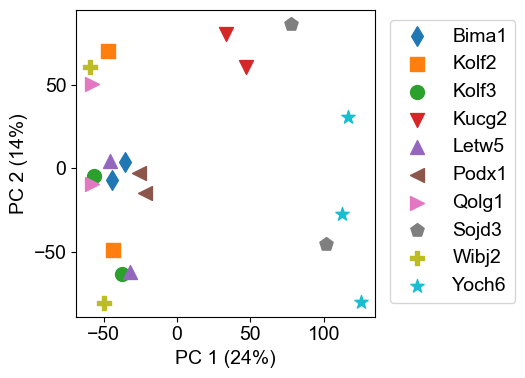

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(5.5, 4)
markers=["d" , "," , "o" , "v" , "^" , "<", ">","p", "P", "*"]
for i in range(10):
    ax.scatter([PCAs_scatter[2*i,0],PCAs_scatter[2*i+1,0]],[PCAs_scatter[2*i,1],PCAs_scatter[2*i+1,1]],color=cmap(i/10.0), marker=markers[i], label=lines[i], s=100)

ax.scatter([PCAs_scatter[20,0]],[PCAs_scatter[20,1]],color=cmap(i/10.0), marker=markers[9], s=100)
ax.legend(bbox_to_anchor=(1.02, 1), ncols=1)
ax.set_xlabel("PC 1 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[0]*100)[0:2]+"%)")
ax.set_ylabel("PC 2 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[1]*100)[0:2]+"%)")

plt.tight_layout()
plt.savefig('Fig2A.tif', dpi = 150)
#for i in range(20):
#    ax.annotate(TPM_ipsc_prot.columns.values[1:][i], (PCAs_scatter[i,0],PCAs_scatter[i,1]))

In [4]:
#Open the annotation
data=open(r"C:\Users\movilla\Documents\HG annotations\genes\HsGRCh38_Ens_gene_protein.gff3")
#There will be two arrays. Original one with geneid and a numpy copy for the mathematical operations.

#Info: chromosome, start, end, strand, geneid.
genes=[]
for line in data:
    row=line.split()
    try:
        float(row[0])
        genes.append([row[0],int(row[3]),int(row[4]), row[6], row[8]])
        if float(row[0])==5 and row[2]=='gene' and float(row[3])==6633290:
            print(row)
    except:
        continue

genesc=[]
for gene in genes:
    genesc.append([gene[4][8:],gene[0],gene[2]-gene[1]])
genelength=pd.DataFrame(genesc)
genelength=genelength.rename(columns={2: "glength", 1:"chrom", 0: "geneid"})

['5', 'ensembl_havana', 'gene', '6633290', '6676539', '.', '+', '.', 'gene_id=ENSG00000145545']


In [11]:
genelength

,geneid,chrom,glength
0,ENSG00000186092,1,6166
1,ENSG00000284733,1,938
2,ENSG00000284662,1,938
3,ENSG00000187634,1,20652
4,ENSG00000188976,1,15106
...,...,...,...
20578,ENSG00000148399,9,24481
20579,ENSG00000165724,9,8431
20580,ENSG00000197070,9,9675
20581,ENSG00000181090,9,251024


In [5]:
genelength.to_csv('genelength.csv')

In [33]:
K27genesr1=pd.DataFrame(TPM_ipsc[["geneid"]])
K27genesr2=pd.DataFrame(TPM_ipsc[["geneid"]])
K27pm1kr1=pd.DataFrame(TPM_ipsc[["geneid"]])
K27pm1kr2=pd.DataFrame(TPM_ipsc[["geneid"]])
K9genesr1=pd.DataFrame(TPM_ipsc[["geneid"]])
K9genesr2=pd.DataFrame(TPM_ipsc[["geneid"]])
K9pm1kr1=pd.DataFrame(TPM_ipsc[["geneid"]])
K9pm1kr2=pd.DataFrame(TPM_ipsc[["geneid"]])
K4pm1kr1=pd.DataFrame(TPM_ipsc[["geneid"]])    
K4pm1kr2=pd.DataFrame(TPM_ipsc[["geneid"]])    

reps=["r1","r2"]
for rep in reps:
    for strl in lines:
        filename="CnTreps\\"+strl+"_k27me3_"+rep+"_genem1k.dat"
        K27line=pd.read_csv(filename, sep='\t', header=None, lineterminator='\n')
        colname="K27gene_"+strl
        K27line=K27line.rename(columns={1: "geneid", 2: colname})
        K27line=K27line[["geneid",colname]]
        K27line=pd.merge(K27line, genelength,on="geneid", how="inner")
        K27line.loc[:,colname]=K27line.loc[:,colname]/(K27line.loc[:,"glength"]-1000)
        if rep=="r1":
            colname2="K27gene_"+strl+"_"+rep
            K27line=K27line.rename(columns={colname: colname2})
            K27genesr1=pd.merge(K27genesr1,K27line[["geneid",colname2]], on="geneid", how="left")
        elif rep=="r2":
            colname2="K27gene_"+strl+"_"+rep
            K27line=K27line.rename(columns={colname: colname2})
            K27genesr2=pd.merge(K27genesr2,K27line[["geneid",colname2]], on="geneid", how="left")
                
    for strl in lines:
        filename="CnTreps\\"+strl+"_k27me3_"+rep+"prompm1k.dat"
        K27line=pd.read_csv(filename, sep='\t', header=None, lineterminator='\n')
        colname="K27pm1k_"+strl
        K27line=K27line.rename(columns={1: "geneid", 2: colname})
        K27line=K27line[["geneid",colname]]
        K27line.loc[:,colname]=K27line.loc[:,colname]/2000
        if rep=="r1":
            colname2="K27pm1k_"+strl+"_"+rep
            K27line=K27line.rename(columns={colname: colname2})
            K27pm1kr1=pd.merge(K27pm1kr1,K27line[["geneid",colname2]], on="geneid", how="left")
        elif rep=="r2":
            colname2="K27pm1k_"+strl+"_"+rep
            K27line=K27line.rename(columns={colname: colname2})
            K27pm1kr2=pd.merge(K27pm1kr2,K27line[["geneid",colname2]], on="geneid", how="left")
            
    for strl in lines:
        filename="CnTreps\\"+strl+"_k9me3_"+rep+"_genem1k.dat"
        data_line=pd.read_csv(filename, sep='\t', header=None, lineterminator='\n')
        colname="K9gene_"+strl
        colname2="K9gene_"+strl+"_"+rep
        data_line=data_line.rename(columns={1: "geneid", 2: colname})
        data_line=data_line[["geneid",colname]]
        data_line=pd.merge(data_line, genelength,on="geneid", how="inner")
        data_line.loc[:,colname]=data_line.loc[:,colname]/(data_line.loc[:,"glength"]-1000)
        data_line=data_line.rename(columns={colname: colname2})
        if rep=="r1":
            K9genesr1=pd.merge(K9genesr1,data_line[["geneid",colname2]], on="geneid", how="left")
        elif rep=="r2":
            K9genesr2=pd.merge(K9genesr2,data_line[["geneid",colname2]], on="geneid", how="left")
            
    for strl in lines:
        filename="CnTreps\\"+strl+"_k9me3_"+rep+"prompm1k.dat"
        data_line=pd.read_csv(filename, sep='\t', header=None, lineterminator='\n')
        colname="K9pm1k_"+strl
        colname2="K9pm1k_"+strl+"_"+rep
        data_line=data_line.rename(columns={1: "geneid", 2: colname})
        data_line=data_line[["geneid",colname]]
        data_line.loc[:,colname]=data_line.loc[:,colname]/2000
        data_line=data_line.rename(columns={colname: colname2})
        if rep=="r1":
            K9pm1kr1=pd.merge(K9pm1kr1,data_line[["geneid",colname2]], on="geneid", how="left")
        elif rep=="r2":
            K9pm1kr2=pd.merge(K9pm1kr2,data_line[["geneid",colname2]], on="geneid", how="left")
            
    for strl in lines:
        filename="CnTreps\\"+strl+"_k4me3_"+rep+"prompm1k.dat"
        data_line=pd.read_csv(filename, sep='\t', header=None, lineterminator='\n')
        colname="K4pm1k_"+strl
        colname2="K4pm1k_"+strl+"_"+rep
        data_line=data_line.rename(columns={1: "geneid", 2: colname})
        data_line=data_line[["geneid",colname]]
        data_line.loc[:,colname]=data_line.loc[:,colname]/2000
        data_line=data_line.rename(columns={colname: colname2})
        if rep=="r1":
            K4pm1kr1=pd.merge(K4pm1kr1,data_line[["geneid",colname2]], on="geneid", how="left")
        elif rep=="r2":
            K4pm1kr2=pd.merge(K4pm1kr2,data_line[["geneid",colname2]], on="geneid", how="left")
            

reps=["r1","r2", "r3"]
ATACpm1kr1=pd.DataFrame(TPM_ipsc[["geneid"]])    
ATACpm1kr2=pd.DataFrame(TPM_ipsc[["geneid"]])    
ATACpm1kr3=pd.DataFrame(TPM_ipsc[["geneid"]])    

for rep in reps:
    for strl in lines:
        filename="ATACreps\ATAC_"+strl+"_"+rep+"_prompm1k.dat"
        data_line=pd.read_csv(filename, sep='\t', header=None, lineterminator='\n')
        colname="ATACpm1k_"+strl
        colname2="ATACpm1k_"+strl+"_"+rep
        data_line=data_line.rename(columns={1: "geneid", 2: colname})
        data_line=data_line[["geneid",colname]]
        data_line.loc[:,colname]=data_line.loc[:,colname]/2000
        data_line=data_line.rename(columns={colname: colname2})
        if rep=="r1":
            ATACpm1kr1=pd.merge(ATACpm1kr1,data_line[["geneid",colname2]], on="geneid", how="left")
        elif rep=="r2":
            ATACpm1kr2=pd.merge(ATACpm1kr2,data_line[["geneid",colname2]], on="geneid", how="left")
        elif rep=="r3":
            ATACpm1kr3=pd.merge(ATACpm1kr3,data_line[["geneid",colname2]], on="geneid", how="left")


In [34]:
pipeline = Pipeline([('scaling', StandardScaler(with_mean=False)), ('pca', PCA(n_components=2))])

In [35]:
K27genes_reps=pd.merge(K27genesr1,K27genesr2, on="geneid")
K27pm1k_reps=pd.merge(K27pm1kr1,K27pm1kr2, on="geneid")
K9genes_reps=pd.merge(K9genesr1,K9genesr2, on="geneid")
K9pm1k_reps=pd.merge(K9pm1kr1,K9pm1kr2, on="geneid")
K4pm1k_reps=pd.merge(K4pm1kr1,K4pm1kr2, on="geneid")

ATACpm1k_reps=pd.merge(ATACpm1kr1,ATACpm1kr2, on="geneid")
ATACpm1k_reps=pd.merge(ATACpm1k_reps,ATACpm1kr3, on="geneid")

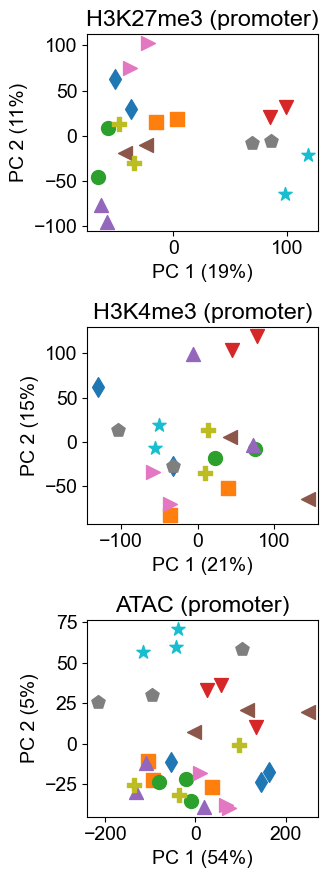

In [36]:
fig, ax = plt.subplots(3,1)
fig.set_size_inches(3.5,9)
markers=["d" , "," , "o" , "v" , "^" , "<", ">","p", "P", "*"]


PCAs_scatter=pipeline.fit_transform(np.transpose(np.array(K27pm1k_reps.iloc[:,1:])))
for i in range(10):
    ax[0].scatter([PCAs_scatter[i,0],PCAs_scatter[i+10,0]],[PCAs_scatter[i,1],PCAs_scatter[i+10,1]],color=cmap(i/10.0), marker=markers[i], label=lines[i], s=100)
#ax[0].legend(bbox_to_anchor=(1.12, -0.15), ncols=4)
ax[0].set_xlabel("PC 1 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[0]*100)[0:2]+"%)")
ax[0].set_ylabel("PC 2 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[1]*100)[0:2]+"%)")
ax[0].set_title("H3K27me3 (promoter)")


PCAs_scatter=pipeline.fit_transform(np.transpose(np.array(K4pm1k_reps.iloc[:,1:])))
for i in range(10):
    ax[1].scatter([PCAs_scatter[i,0],PCAs_scatter[i+10,0]],[PCAs_scatter[i,1],PCAs_scatter[i+10,1]],color=cmap(i/10.0), marker=markers[i], label=lines[i], s=100)
ax[1].set_xlabel("PC 1 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[0]*100)[0:2]+"%)")
ax[1].set_ylabel("PC 2 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[1]*100)[0:2]+"%)")
ax[1].set_title("H3K4me3 (promoter)")

PCAs_scatter=pipeline.fit_transform(np.transpose(np.array(ATACpm1k_reps.iloc[:,1:])))
for i in range(10):
    ax[2].scatter([PCAs_scatter[i,0],PCAs_scatter[i+10,0],PCAs_scatter[i+20,0]],[PCAs_scatter[i,1],PCAs_scatter[i+10,1],PCAs_scatter[i+20,1]],color=cmap(i/10.0), marker=markers[i], label=lines[i], s=100)
#ax[0,0].legend(bbox_to_anchor=(1.12, -0.15), ncols=4)
ax[2].set_xlabel("PC 1 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[0]*100)[0:2]+"%)")
ax[2].set_ylabel("PC 2 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[1]*100)[0:1]+"%)")
ax[2].set_title("ATAC (promoter)")

#handles, labels = ax[1,2].get_legend_handles_labels()
#fig.legend(handles, labels,  bbox_to_anchor=(1.15, 0.75), ncols=1)
#ax[1,2].legend(bbox_to_anchor=(1.0, -0.2), ncols=5)

fig.tight_layout()   
plt.savefig('Fig_2D.tif', dpi = 150)


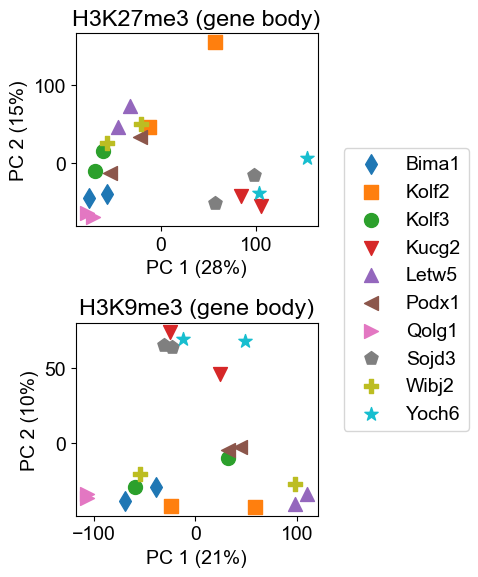

In [37]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(3.5,6)
markers=["d" , "," , "o" , "v" , "^" , "<", ">","p", "P", "*"]

PCAs_scatter=pipeline.fit_transform(np.transpose(np.array(K27genes_reps.iloc[:,1:])))
for i in range(10):
    ax[0].scatter([PCAs_scatter[i,0],PCAs_scatter[i+10,0]],[PCAs_scatter[i,1],PCAs_scatter[i+10,1]],color=cmap(i/10.0), marker=markers[i], label=lines[i], s=100)
#ax[0,0].legend(bbox_to_anchor=(1.12, -0.15), ncols=4)
ax[0].set_xlabel("PC 1 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[0]*100)[0:2]+"%)")
ax[0].set_ylabel("PC 2 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[1]*100)[0:2]+"%)")
ax[0].set_title("H3K27me3 (gene body)")


PCAs_scatter=pipeline.fit_transform(np.transpose(np.array(K9genes_reps.iloc[:,1:])))
for i in range(10):
    ax[1].scatter([PCAs_scatter[i,0],PCAs_scatter[i+10,0]],[PCAs_scatter[i,1],PCAs_scatter[i+10,1]],color=cmap(i/10.0), marker=markers[i], label=lines[i], s=100)
#ax[0,0].legend(bbox_to_anchor=(1.12, -0.15), ncols=4)
ax[1].set_xlabel("PC 1 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[0]*100)[0:2]+"%)")
ax[1].set_ylabel("PC 2 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[1]*100)[0:2]+"%)")
ax[1].set_title("H3K9me3 (gene body)")



handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels,  bbox_to_anchor=(1.4, 0.75), ncols=1)
#ax[1,2].legend(bbox_to_anchor=(1.0, -0.2), ncols=5)

fig.tight_layout()   
plt.savefig('Fig_S4C.tif', dpi = 150)


## m1k promoter (if needed, not currently in manuscript) ##

In [38]:
K27m1kr1=pd.DataFrame(TPM_ipsc[["geneid"]])
K27m1kr2=pd.DataFrame(TPM_ipsc[["geneid"]])
K9m1kr1=pd.DataFrame(TPM_ipsc[["geneid"]])
K9m1kr2=pd.DataFrame(TPM_ipsc[["geneid"]])
K4m1kr1=pd.DataFrame(TPM_ipsc[["geneid"]])    
K4m1kr2=pd.DataFrame(TPM_ipsc[["geneid"]])   
lines = ["bima1", "kolf2", "kolf3", "kucg2", "letw5", "podx1", "qolg1", "sojd3", "wibj2", "yoch6"] 

reps=["r1","r2"]
for rep in reps:
    for strl in lines:
        filename="CnTreps\\"+strl+"_k27me3_"+rep+"_prom_m1k.dat"
        K27line=pd.read_csv(filename, sep='\t', header=None, lineterminator='\n')
        colname="K27pm1k_"+strl
        K27line=K27line.rename(columns={1: "geneid", 2: colname})
        K27line=K27line[["geneid",colname]]
        K27line.loc[:,colname]=K27line.loc[:,colname]/1000
        if rep=="r1":
            colname2="K27gene_"+strl+"_"+rep
            K27line=K27line.rename(columns={colname: colname2})
            K27m1kr1=pd.merge(K27m1kr1,K27line[["geneid",colname2]], on="geneid", how="left")
        elif rep=="r2":
            colname2="K27gene_"+strl+"_"+rep
            K27line=K27line.rename(columns={colname: colname2})
            K27m1kr2=pd.merge(K27m1kr2,K27line[["geneid",colname2]], on="geneid", how="left")
            
            
    for strl in lines:
        filename="CnTreps\\"+strl+"_k9me3_"+rep+"_prom_m1k.dat"
        data_line=pd.read_csv(filename, sep='\t', header=None, lineterminator='\n')
        colname="K9pm1k_"+strl
        colname2="K9pm1k_"+strl+"_"+rep
        data_line=data_line.rename(columns={1: "geneid", 2: colname})
        data_line=data_line[["geneid",colname]]
        data_line.loc[:,colname]=data_line.loc[:,colname]/1000
        data_line=data_line.rename(columns={colname: colname2})
        if rep=="r1":
            K9m1kr1=pd.merge(K9m1kr1,data_line[["geneid",colname2]], on="geneid", how="left")
        elif rep=="r2":
            K9m1kr2=pd.merge(K9m1kr2,data_line[["geneid",colname2]], on="geneid", how="left")
            
    for strl in lines:
        filename="CnTreps\\"+strl+"_k4me3_"+rep+"_prom_m1k.dat"
        data_line=pd.read_csv(filename, sep='\t', header=None, lineterminator='\n')
        colname="K4pm1k_"+strl
        colname2="K4pm1k_"+strl+"_"+rep
        data_line=data_line.rename(columns={1: "geneid", 2: colname})
        data_line=data_line[["geneid",colname]]
        data_line.loc[:,colname]=data_line.loc[:,colname]/1000
        data_line=data_line.rename(columns={colname: colname2})
        if rep=="r1":
            K4m1kr1=pd.merge(K4m1kr1,data_line[["geneid",colname2]], on="geneid", how="left")
        elif rep=="r2":
            K4m1kr2=pd.merge(K4m1kr2,data_line[["geneid",colname2]], on="geneid", how="left")
            

lines = ["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"] 

reps=["r1","r2", "r3"]
ATACm1kr1=pd.DataFrame(TPM_ipsc[["geneid"]])    
ATACm1kr2=pd.DataFrame(TPM_ipsc[["geneid"]])    
ATACm1kr3=pd.DataFrame(TPM_ipsc[["geneid"]])    

for rep in reps:
    for strl in lines:
        filename="ATACreps\ATAC_"+strl+"_"+rep+"_prom_m1k.dat"
        data_line=pd.read_csv(filename, sep='\t', header=None, lineterminator='\n')
        colname="ATACpm1k_"+strl
        colname2="ATACpm1k_"+strl+"_"+rep
        data_line=data_line.rename(columns={1: "geneid", 2: colname})
        data_line=data_line[["geneid",colname]]
        data_line.loc[:,colname]=data_line.loc[:,colname]/2000
        data_line=data_line.rename(columns={colname: colname2})
        if rep=="r1":
            ATACm1kr1=pd.merge(ATACm1kr1,data_line[["geneid",colname2]], on="geneid", how="left")
        elif rep=="r2":
            ATACm1kr2=pd.merge(ATACm1kr2,data_line[["geneid",colname2]], on="geneid", how="left")
        elif rep=="r3":
            ATACm1kr3=pd.merge(ATACm1kr3,data_line[["geneid",colname2]], on="geneid", how="left")


In [39]:
K27m1kreps=pd.merge(K27m1kr1,K27m1kr2, on="geneid")
K9m1kreps=pd.merge(K9m1kr1,K9m1kr2, on="geneid")
K4m1kreps=pd.merge(K4m1kr1,K4m1kr2, on="geneid")

ATACm1k_reps=pd.merge(ATACm1kr1,ATACm1kr2, on="geneid")
ATACm1k_reps=pd.merge(ATACm1k_reps,ATACm1kr3, on="geneid")

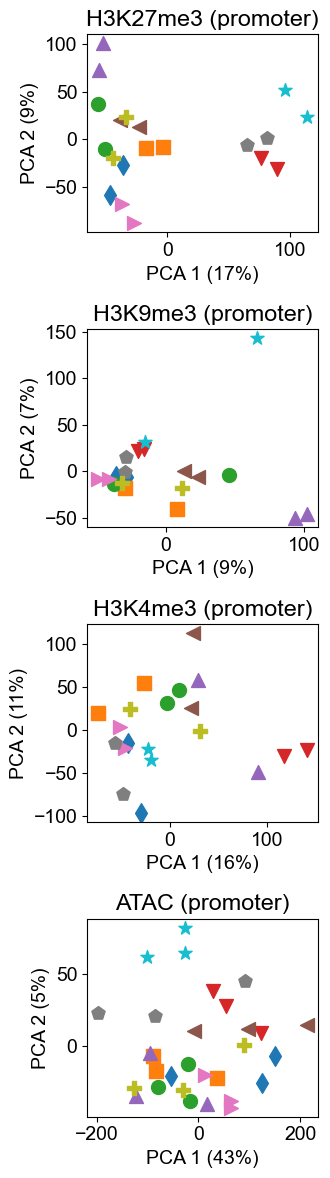

In [40]:
fig, ax = plt.subplots(4,1)
fig.set_size_inches(3.5,12)
markers=["d" , "," , "o" , "v" , "^" , "<", ">","p", "P", "*"]


PCAs_scatter=pipeline.fit_transform(np.transpose(np.array(K27m1kreps.iloc[:,1:])))
for i in range(10):
    ax[0].scatter([PCAs_scatter[i,0],PCAs_scatter[i+10,0]],[PCAs_scatter[i,1],PCAs_scatter[i+10,1]],color=cmap(i/10.0), marker=markers[i], label=lines[i], s=100)
#ax[0].legend(bbox_to_anchor=(1.12, -0.15), ncols=4)
ax[0].set_xlabel("PCA 1 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[0]*100)[0:2]+"%)")
ax[0].set_ylabel("PCA 2 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[1]*100)[0:1]+"%)")
ax[0].set_title("H3K27me3 (promoter)")

PCAs_scatter=pipeline.fit_transform(np.transpose(np.array(K9m1kreps.iloc[:,1:])))
for i in range(10):
    ax[1].scatter([PCAs_scatter[i,0],PCAs_scatter[i+10,0]],[PCAs_scatter[i,1],PCAs_scatter[i+10,1]],color=cmap(i/10.0), marker=markers[i], label=lines[i], s=100)
ax[1].set_xlabel("PCA 1 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[0]*100)[0:1]+"%)")
ax[1].set_ylabel("PCA 2 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[1]*100)[0:1]+"%)")
ax[1].set_title("H3K9me3 (promoter)")

PCAs_scatter=pipeline.fit_transform(np.transpose(np.array(K4m1kreps.iloc[:,1:])))
for i in range(10):
    ax[2].scatter([PCAs_scatter[i,0],PCAs_scatter[i+10,0]],[PCAs_scatter[i,1],PCAs_scatter[i+10,1]],color=cmap(i/10.0), marker=markers[i], label=lines[i], s=100)
ax[2].set_xlabel("PCA 1 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[0]*100)[0:2]+"%)")
ax[2].set_ylabel("PCA 2 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[1]*100)[0:2]+"%)")
ax[2].set_title("H3K4me3 (promoter)")

PCAs_scatter=pipeline.fit_transform(np.transpose(np.array(ATACm1k_reps.iloc[:,1:])))
for i in range(10):
    ax[3].scatter([PCAs_scatter[i,0],PCAs_scatter[i+10,0],PCAs_scatter[i+20,0]],[PCAs_scatter[i,1],PCAs_scatter[i+10,1],PCAs_scatter[i+20,1]],color=cmap(i/10.0), marker=markers[i], label=lines[i], s=100)
#ax[0,0].legend(bbox_to_anchor=(1.12, -0.15), ncols=4)
ax[3].set_xlabel("PCA 1 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[0]*100)[0:2]+"%)")
ax[3].set_ylabel("PCA 2 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[1]*100)[0:1]+"%)")
ax[3].set_title("ATAC (promoter)")

#handles, labels = ax[1,2].get_legend_handles_labels()
#fig.legend(handles, labels,  bbox_to_anchor=(1.15, 0.75), ncols=1)
#ax[1,2].legend(bbox_to_anchor=(1.0, -0.2), ncols=5)

fig.tight_layout()   


In [45]:
K27genesr1=pd.DataFrame(TPM_ipsc[["geneid"]])
K27genesr2=pd.DataFrame(TPM_ipsc[["geneid"]])
K9genesr1=pd.DataFrame(TPM_ipsc[["geneid"]])
K9genesr2=pd.DataFrame(TPM_ipsc[["geneid"]])
   

reps=["r1","r2"]
for rep in reps:
    for strl in lines:
        filename="CnTreps\\"+strl+"_k27me3_"+rep+"gene.dat"
        K27line=pd.read_csv(filename, sep='\t', header=None, lineterminator='\n')
        colname="K27gene_"+strl
        K27line=K27line.rename(columns={1: "geneid", 2: colname})
        K27line=K27line[["geneid",colname]]
        K27line=pd.merge(K27line, genelength,on="geneid", how="inner")
        K27line.loc[:,colname]=K27line.loc[:,colname]/(K27line.loc[:,"glength"])
        if rep=="r1":
            colname2="K27gene_"+strl+"_"+rep
            K27line=K27line.rename(columns={colname: colname2})
            K27genesr1=pd.merge(K27genesr1,K27line[["geneid",colname2]], on="geneid", how="left")
        elif rep=="r2":
            colname2="K27gene_"+strl+"_"+rep
            K27line=K27line.rename(columns={colname: colname2})
            K27genesr2=pd.merge(K27genesr2,K27line[["geneid",colname2]], on="geneid", how="left")

            
    for strl in lines:
        filename="CnTreps\\"+strl+"_k9me3_"+rep+"gene.dat"
        data_line=pd.read_csv(filename, sep='\t', header=None, lineterminator='\n')
        colname="K9gene_"+strl
        colname2="K9gene_"+strl+"_"+rep
        data_line=data_line.rename(columns={1: "geneid", 2: colname})
        data_line=data_line[["geneid",colname]]
        data_line=pd.merge(data_line, genelength,on="geneid", how="inner")
        data_line.loc[:,colname]=data_line.loc[:,colname]/(data_line.loc[:,"glength"])
        data_line=data_line.rename(columns={colname: colname2})
        if rep=="r1":
            K9genesr1=pd.merge(K9genesr1,data_line[["geneid",colname2]], on="geneid", how="left")
        elif rep=="r2":
            K9genesr2=pd.merge(K9genesr2,data_line[["geneid",colname2]], on="geneid", how="left")
            

In [46]:
K27genes_reps=pd.merge(K27genesr1,K27genesr2, on="geneid")
K9genes_reps=pd.merge(K9genesr1,K9genesr2, on="geneid")


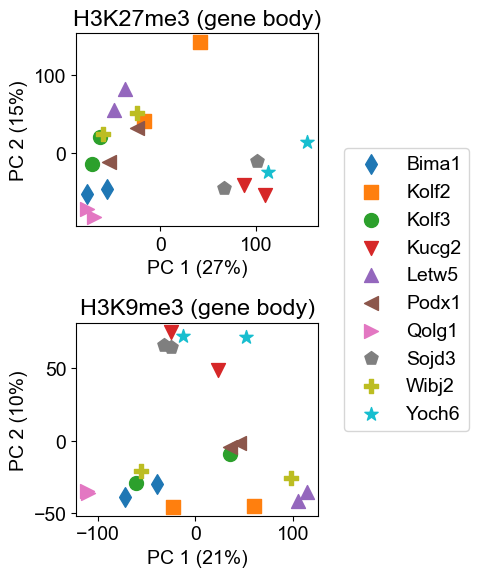

In [47]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(3.5,6)
markers=["d" , "," , "o" , "v" , "^" , "<", ">","p", "P", "*"]

PCAs_scatter=pipeline.fit_transform(np.transpose(np.array(K27genes_reps.iloc[:,1:])))
for i in range(10):
    ax[0].scatter([PCAs_scatter[i,0],PCAs_scatter[i+10,0]],[PCAs_scatter[i,1],PCAs_scatter[i+10,1]],color=cmap(i/10.0), marker=markers[i], label=lines[i], s=100)
#ax[0,0].legend(bbox_to_anchor=(1.12, -0.15), ncols=4)
ax[0].set_xlabel("PC 1 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[0]*100)[0:2]+"%)")
ax[0].set_ylabel("PC 2 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[1]*100)[0:2]+"%)")
ax[0].set_title("H3K27me3 (gene body)")


PCAs_scatter=pipeline.fit_transform(np.transpose(np.array(K9genes_reps.iloc[:,1:])))
for i in range(10):
    ax[1].scatter([PCAs_scatter[i,0],PCAs_scatter[i+10,0]],[PCAs_scatter[i,1],PCAs_scatter[i+10,1]],color=cmap(i/10.0), marker=markers[i], label=lines[i], s=100)
#ax[0,0].legend(bbox_to_anchor=(1.12, -0.15), ncols=4)
ax[1].set_xlabel("PC 1 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[0]*100)[0:2]+"%)")
ax[1].set_ylabel("PC 2 ("+str(pipeline.named_steps['pca'].explained_variance_ratio_[1]*100)[0:2]+"%)")
ax[1].set_title("H3K9me3 (gene body)")



handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels,  bbox_to_anchor=(1.4, 0.75), ncols=1)
#ax[1,2].legend(bbox_to_anchor=(1.0, -0.2), ncols=5)

fig.tight_layout()   
plt.show()